In [55]:
# pip install joypy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
from matplotlib import cm

pd.set_option('max_columns', 500)

In [28]:
df = pd.read_csv(
    "/Volumes/roussou/Microscopy/CellAsic/Atp6_NG_x_Atp6_mKate_WT/all_exp/all_exp/exp4/Position_4/Images/060223_wt_ng_mk.cl1_pos4_acdc_output__.csv"
)  

In [29]:
df_clean = df[
    [
        "frame_i",
        "Cell_ID",
        "relationship",
        "relative_ID",
        "cell_vol_fl",
        "generation_num",
        "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice",
        "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj",
        "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj",
        "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice",
        "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj",
        "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj",
    ]
]

df_clean = df_clean[df_clean.frame_i <= 32]

df_clean["time"] = (15 * df_clean["frame_i"]).div(60)

In [30]:
df_clean

,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,time
0,0,1,mother,-1,237.147993,1,525.317540,856.073027,492.543952,1108.915142,1588.113801,1029.919062,0.00
1,1,1,mother,-1,263.305429,1,548.780938,851.429464,490.674961,1089.225549,1581.281489,1016.275323,0.25
2,2,1,mother,12,205.631348,1,548.573947,961.079146,517.220102,1068.416866,1616.465601,988.712046,0.50
3,2,12,bud,1,38.987031,0,904.762414,1346.345158,775.542397,2542.845614,3404.901518,2136.344133,0.50
4,3,1,mother,12,216.894145,1,531.125449,911.181812,504.966539,928.586616,1465.115622,896.321590,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,32,2197,mother,-1,26.854357,2,1354.975637,1900.920557,1358.048651,2431.709650,3244.501395,2347.576811,8.00
817,32,2198,mother,-1,76.296299,2,112.600481,142.431547,104.665252,1958.889238,2853.559104,1946.391597,8.00
818,32,2200,mother,-1,103.378406,2,101.665332,132.580880,98.104673,1593.330815,2381.116225,1578.681905,8.00
819,32,2201,mother,-1,91.062809,2,1452.283341,2231.053523,1354.049207,218.135156,257.514570,217.026555,8.00


In [31]:
frame_mk_zslice = df_clean.groupby(["time"])["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice"].median()
frame_ng_zslice = df_clean.groupby(["time"])["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice"].median()

In [32]:
frame_mk_maxProj = df_clean.groupby(["time"])["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj"].median()
frame_ng_maxProj = df_clean.groupby(["time"])["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj"].median()

In [33]:
frame_mk_meanProj = df_clean.groupby(["time"])["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj"].median()
frame_ng_meanProj = df_clean.groupby(["time"])["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj"].median()

In [34]:
normalization_factors_zslice = (
    pd.merge(
        frame_mk_zslice,
        frame_ng_zslice,
        left_index=True,
        right_index=True,
        suffixes=("", "_right"),
    )
    .rename(
        columns={
            "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice": "mkate_norm_factor_z",
            "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice": "ng_norm_factor_z",
            
        }
    )
)

normalization_factors_zslice;

In [35]:
normalization_factors_max = (
    pd.merge(
        frame_mk_maxProj,
        frame_ng_maxProj,
        left_index=True,
        right_index=True,
        suffixes=("", "_right"),
    )
    .rename(
        columns={
            "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj": "mkate_norm_factor_max",
            "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj": "ng_norm_factor_max",  
        }
    )
)

normalization_factors_max;

In [36]:
normalization_factors_mean = (
    pd.merge(
        frame_mk_meanProj,
        frame_ng_meanProj,
        left_index=True,
        right_index=True,
        suffixes=("", "_right"),
    )
    .rename(
        columns={
            "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj": "mkate_norm_factor_mean",
            "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj": "ng_norm_factor_mean",
        }
    )
)

normalization_factors_mean;

In [37]:
all_norm_factors_df = pd.merge(normalization_factors_zslice, normalization_factors_max, on='time', how='outer')
all_norm_factors_df = pd.merge(all_norm_factors_df, normalization_factors_mean, on='time', how='outer')
all_norm_factors_df

,mkate_norm_factor_z,ng_norm_factor_z,mkate_norm_factor_max,ng_norm_factor_max,mkate_norm_factor_mean,ng_norm_factor_mean
time,,,,,,
0.00,1108.915142,525.317540,1588.113801,856.073027,1029.919062,492.543952
0.25,1089.225549,548.780938,1581.281489,851.429464,1016.275323,490.674961
0.50,1805.631240,726.668180,2510.683560,1153.712152,1562.528090,646.381250
0.75,1328.077817,660.003351,2194.124245,1087.129876,1271.866208,609.147632
1.00,1279.441666,653.742714,2007.266433,1066.937509,1183.172332,601.158420
1.25,1076.195333,612.198782,1607.173647,947.080858,1002.309815,577.865949
1.50,1159.250477,967.503339,1668.431207,1413.283798,1066.169881,837.829311
1.75,938.302723,919.308268,1416.906048,1382.780588,910.137267,811.238093
2.00,1075.613990,825.460605,1667.013012,1254.685847,1032.563746,774.815427


In [38]:
df_norm = pd.merge(
    df_clean, all_norm_factors_df, left_on=["time"], right_on=["time"]
)
df_norm

,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,time,mkate_norm_factor_z,ng_norm_factor_z,mkate_norm_factor_max,ng_norm_factor_max,mkate_norm_factor_mean,ng_norm_factor_mean
0,0,1,mother,-1,237.147993,1,525.317540,856.073027,492.543952,1108.915142,1588.113801,1029.919062,0.00,1108.915142,525.317540,1588.113801,856.073027,1029.919062,492.543952
1,1,1,mother,-1,263.305429,1,548.780938,851.429464,490.674961,1089.225549,1581.281489,1016.275323,0.25,1089.225549,548.780938,1581.281489,851.429464,1016.275323,490.674961
2,2,1,mother,12,205.631348,1,548.573947,961.079146,517.220102,1068.416866,1616.465601,988.712046,0.50,1805.631240,726.668180,2510.683560,1153.712152,1562.528090,646.381250
3,2,12,bud,1,38.987031,0,904.762414,1346.345158,775.542397,2542.845614,3404.901518,2136.344133,0.50,1805.631240,726.668180,2510.683560,1153.712152,1562.528090,646.381250
4,3,1,mother,12,216.894145,1,531.125449,911.181812,504.966539,928.586616,1465.115622,896.321590,0.75,1328.077817,660.003351,2194.124245,1087.129876,1271.866208,609.147632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,32,2197,mother,-1,26.854357,2,1354.975637,1900.920557,1358.048651,2431.709650,3244.501395,2347.576811,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377
817,32,2198,mother,-1,76.296299,2,112.600481,142.431547,104.665252,1958.889238,2853.559104,1946.391597,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377
818,32,2200,mother,-1,103.378406,2,101.665332,132.580880,98.104673,1593.330815,2381.116225,1578.681905,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377
819,32,2201,mother,-1,91.062809,2,1452.283341,2231.053523,1354.049207,218.135156,257.514570,217.026555,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377


In [39]:
df_norm["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm"] = (
    df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice / df_norm.ng_norm_factor_z
)
df_norm["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice / df_norm.mkate_norm_factor_z
)

df_norm["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm"] = (
    df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj / df_norm.ng_norm_factor_max
)
df_norm["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj / df_norm.mkate_norm_factor_max
)

df_norm["_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm"] = (
    df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj / df_norm.ng_norm_factor_mean
)
df_norm["_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj / df_norm.mkate_norm_factor_mean
)

In [40]:
df_norm

,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,time,mkate_norm_factor_z,ng_norm_factor_z,mkate_norm_factor_max,ng_norm_factor_max,mkate_norm_factor_mean,ng_norm_factor_mean,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm
0,0,1,mother,-1,237.147993,1,525.317540,856.073027,492.543952,1108.915142,1588.113801,1029.919062,0.00,1108.915142,525.317540,1588.113801,856.073027,1029.919062,492.543952,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,1,mother,-1,263.305429,1,548.780938,851.429464,490.674961,1089.225549,1581.281489,1016.275323,0.25,1089.225549,548.780938,1581.281489,851.429464,1016.275323,490.674961,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2,1,mother,12,205.631348,1,548.573947,961.079146,517.220102,1068.416866,1616.465601,988.712046,0.50,1805.631240,726.668180,2510.683560,1153.712152,1562.528090,646.381250,0.754917,0.591714,0.833032,0.643835,0.800178,0.632764
3,2,12,bud,1,38.987031,0,904.762414,1346.345158,775.542397,2542.845614,3404.901518,2136.344133,0.50,1805.631240,726.668180,2510.683560,1153.712152,1562.528090,646.381250,1.245083,1.408286,1.166968,1.356165,1.199822,1.367236
4,3,1,mother,12,216.894145,1,531.125449,911.181812,504.966539,928.586616,1465.115622,896.321590,0.75,1328.077817,660.003351,2194.124245,1087.129876,1271.866208,609.147632,0.804731,0.699196,0.838154,0.667745,0.828972,0.704729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,32,2197,mother,-1,26.854357,2,1354.975637,1900.920557,1358.048651,2431.709650,3244.501395,2347.576811,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377,1.117060,2.157462,1.045300,2.046540,1.145829,2.150277
817,32,2198,mother,-1,76.296299,2,112.600481,142.431547,104.665252,1958.889238,2853.559104,1946.391597,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377,0.092829,1.737966,0.078322,1.799945,0.088309,1.782809
818,32,2200,mother,-1,103.378406,2,101.665332,132.580880,98.104673,1593.330815,2381.116225,1578.681905,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377,0.083814,1.413635,0.072905,1.501941,0.082774,1.446003
819,32,2201,mother,-1,91.062809,2,1452.283341,2231.053523,1354.049207,218.135156,257.514570,217.026555,8.00,1127.115913,1212.983450,1585.358998,1818.540619,1091.755775,1185.210377,1.197282,0.193534,1.226837,0.162433,1.142455,0.198787


In [41]:
df_norm["h_zslice"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm
    / (df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm + df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_zSlice_norm)
)

In [42]:
df_norm["h_max"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm
    / (df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm + df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_maxProj_norm)
)

In [43]:
df_norm["h_mean"] = (
    df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm
    / (df_norm._NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm + df_norm._mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj_norm)
)

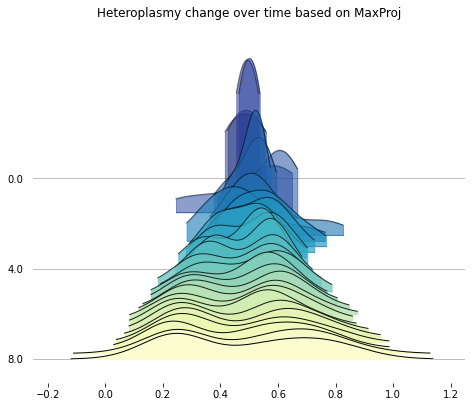

In [56]:
labels=[y if y%10==0 or y == 4.0 or y == 8.0 else None for y in list(df_norm.time.unique())]
fig, axes = joypy.joyplot(df_norm, by="time", column="h_max", range_style='own', 
                          overlap=3, linewidth=1, legend=False,  fade=True,labels=labels, 
                          grid="y", figsize=(6,5), x_range=[-0.25,1.25],
                          title="Heteroplasmy change over time based on MaxProj",
                          colormap=cm.YlGnBu_r)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

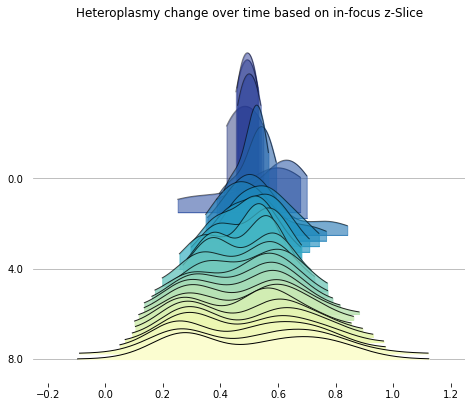

In [57]:
labels=[y if y%10==0 or y == 4.0 or y == 8.0 else None for y in list(df_norm.time.unique())]
fig, axes = joypy.joyplot(df_norm, by="time", column="h_zslice", range_style='own', 
                          overlap=3, linewidth=1, legend=False,  fade=True,labels=labels, 
                          grid="y", figsize=(6,5), x_range=[-0.25,1.25],
                          title="Heteroplasmy change over time based on in-focus z-Slice",
                          colormap=cm.YlGnBu_r)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

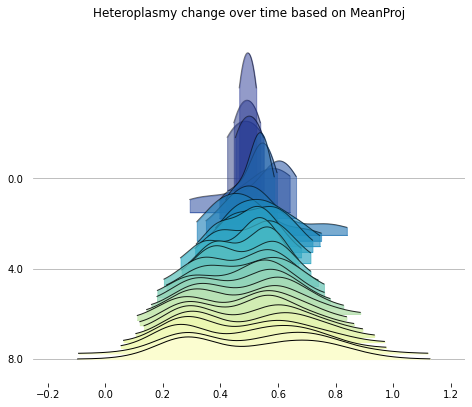

In [58]:
labels=[y if y%10==0 or y == 4.0 or y == 8.0 else None for y in list(df_norm.time.unique())]
fig, axes = joypy.joyplot(df_norm, by="time", column="h_mean", range_style='own', 
                          overlap=3, linewidth=1, legend=False,  fade=True,labels=labels, 
                          grid="y", figsize=(6,5), x_range=[-0.25,1.25],
                          title="Heteroplasmy change over time based on MeanProj",
                          colormap=cm.YlGnBu_r)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)